# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load both datasets:


In [ ]:
fe_gr_data = pd.read_csv("fear_greed_index.csv")
his_data = pd.read_csv("historical_data.csv")


In [ ]:
# Fear greed number of rows/columns
fe_gr_data.shape #(2644 rows, 4 Columns)

(2644, 4)

In [ ]:
# Fear greed missing values
fe_gr_data.isna().sum() # no missing value

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
# Fear greed duplicates
fe_gr_data.duplicated().sum() # no duplicate values

np.int64(0)

now same for histoical data

In [ ]:
#  histoical data number of rows/columns
his_data.shape #(211224 rows, 16 Columns)

(211224, 16)

In [ ]:
#  histoical data missing values
his_data.isna().sum() #no missing value

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
# Fear greed duplicates
his_data.duplicated().sum() # no duplicate values

np.int64(0)

In [ ]:
# Addition info
print("-"*60)
print("historical data")
print("-"*60)
his_data.info()
print("-"*60)
print("fear & greed Data")
print("-"*60)
fe_gr_data.info()

------------------------------------------------------------
historical data
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 n

In [ ]:
fe_gr_data['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


## Data Quality Check

The fe_gr_dataset(fear_greed_index.csv) dataset contains 2644 daily records with no major
missing values.

The His_data(histroical_data.csv) dataset contains over 211k trades across multiple accounts.
No missing and duplicate data found.
Most rows represent executions, not completed trades. PnL materializes only when positions are closed

In [ ]:
# Convert timestamps and align the datasets by date (daily level is fine).

fe_gr_data['date'] = pd.to_datetime(fe_gr_data['date']) # Take the date column in fe_gr_data and converts it from String or Object to Pandas datetime eg:"2024-01-05" → 2024-01-05 00:00:00
his_data['Timestamp'] = pd.to_datetime(his_data['Timestamp'], unit='ms') #Converts UNIX timestamps in miliseconds into real datetimes eg:1704451200000 → 2024-01-05 10:40:00. also if i skip units='ms' pandas might interpret wrong

his_data['date'] = his_data['Timestamp'].dt.date # this line Extract only date part and removes time(hr,min,sec)
fe_gr_data['date'] = fe_gr_data['date'].dt.date


In [ ]:
fe_gr_data

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
his_data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40,2025-06-15


After Data quality check, we get to know that since trades(his_data) occur at intraday level while sentiments(fe_gr_data) is daily, all trades were aligned to their repective dat

In [52]:
def map_sentiment(x):
    if x in ["Fear", "Extreme Fear"]:
        return "Fear"
    elif x in ["Greed", "Extreme Greed"]:
        return "Greed"
    else:
        return "Neutral"

fe_gr_data["sentiment_bucket"] = fe_gr_data["classification"].apply(map_sentiment)

# Keep only Fear and Greed for core analysis
sentiment= fe_gr_data[fe_gr_data["sentiment_bucket"].isin(["Fear", "Greed"])]

sentiment.head()

,timestamp,value,classification,date,sentiment,sentiment_bucket
0,1517463000,30,Fear,2018-02-01,Fear,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Extreme Fear,Fear
2,1517635800,40,Fear,2018-02-03,Fear,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Extreme Fear,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Extreme Fear,Fear


In [54]:
fe_gr_data['sentiment_bucket'].value_counts()

,count
sentiment_bucket,
Fear,1289
Greed,959
Neutral,396


In [56]:
# Merge dataset(fe_gr_data + his_data)

df = his_data.merge(
    fe_gr_data[["date","sentiment_bucket"]],
    on="date",
    how="inner"
)

In [57]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_bucket
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-02-19 21:20:00,2025-02-19,Fear
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-02-19 21:20:00,2025-02-19,Fear
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-02-19 21:20:00,2025-02-19,Fear
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-02-19 21:20:00,2025-02-19,Fear


In [58]:
acc_per_day = (
    df.groupby(["Account", "date", "sentiment_bucket"]).agg(
        daily_pnl=("Closed PnL", "sum"),
        num_trades=("Closed PnL", "count"),
        avg_trade_size=("Size USD", "mean"),
        total_fees=("Fee", "sum"),
        win_rate=("Closed PnL", lambda x: (x > 0).mean()),
        longs=("Side", lambda x: (x == "BUY").sum()),
        shorts=("Side", lambda x: (x == "SELL").sum())
    )
    .reset_index()
)

acc_per_day["long_short_ratio"] = acc_per_day["longs"] / (acc_per_day["shorts"] + 1)

In [92]:
acc_per_day["risk_bucket"] = pd.qcut(
    acc_per_day["avg_trade_size"],
    q=3,
    labels=["Low Risk", "Medium Risk", "High Risk"]
)


In [97]:
pnl_summary = (
    acc_per_day
    .groupby("sentiment_bucket")
    .agg(
        mean_pnl=("daily_pnl", "mean"),
        median_pnl=("daily_pnl", "median"),
        pnl_volatility=("daily_pnl", "std"),
        avg_win_rate=("win_rate", "mean")
    )
)

pnl_summary


,mean_pnl,median_pnl,pnl_volatility,avg_win_rate
sentiment_bucket,,,,
Fear,209372.662205,81389.682515,380423.906864,0.415878
Greed,90988.703436,20925.513222,264805.415699,0.369012
Neutral,19842.797260,-0.418640,57227.787895,0.260683


In [59]:
acc_per_day.head()

,Account,date,sentiment_bucket,daily_pnl,num_trades,avg_trade_size,total_fees,win_rate,longs,shorts,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,14810.891818,1112.895650,0.025974,139,323,0.429012
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,16345.241940,6292.416654,0.405542,1572,1784,0.880672
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,2492.749906,202.167151,0.531250,145,175,0.823864
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,1693.351684,1664.914670,0.435041,1528,2005,0.761715
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,6070.200000,10.197932,0.000000,2,3,0.500000


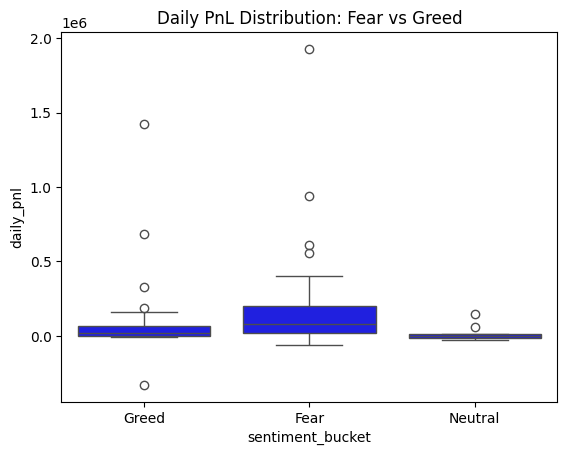

In [98]:
sns.boxplot(data=acc_per_day, x="sentiment_bucket", y="daily_pnl",color="blue")
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()

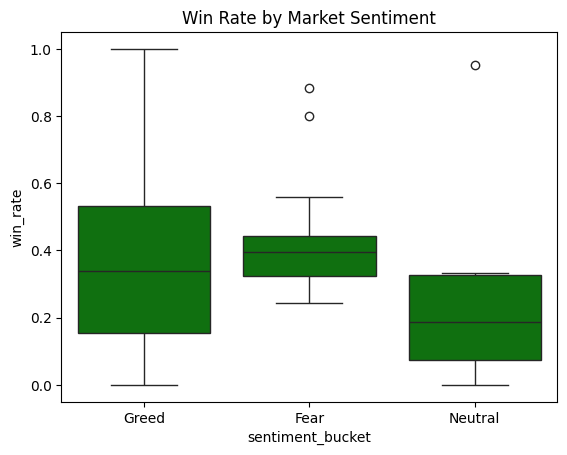

In [99]:
acc_per_day.groupby("sentiment_bucket")["win_rate"].mean()

sns.boxplot(data=acc_per_day, x="sentiment_bucket", y="win_rate",color="green")
plt.title("Win Rate by Market Sentiment")
plt.show()

# insight
Consistent vs Inconsistent traders
Consistent traders demonstrate relatively stable performance across both Fear and Greed sentiment regimes, with similar average daily PnL in each. In contrast, inconsistent traders show strong sensitivity to market sentiment, generating extreme outcomes during Greed periods but with substantially higher risk.

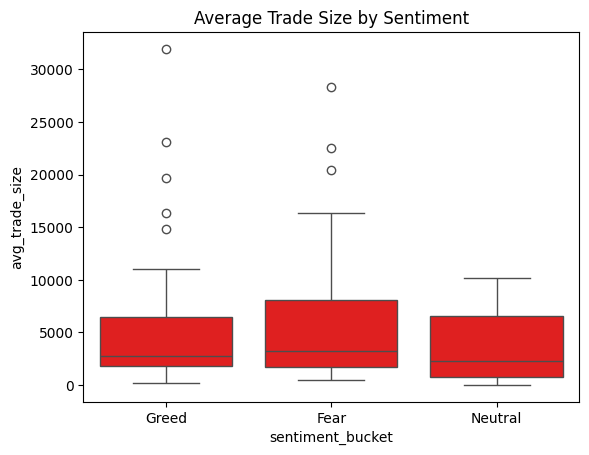

In [100]:
sns.boxplot(data=acc_per_day, x="sentiment_bucket", y="avg_trade_size",color="red")
plt.title("Average Trade Size by Sentiment")
plt.show()


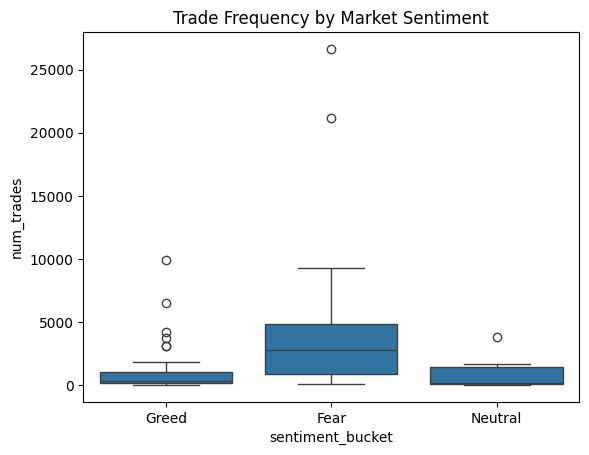

In [101]:

sns.boxplot(data=acc_per_day, x="sentiment_bucket", y="num_trades")
plt.title("Trade Frequency by Market Sentiment")
plt.show()


# Insight
Frequent vs Infrequent traders
Frequent traders tend to increase trading activity during Greed periods, leading to higher variability in daily PnL outcomes. Infrequent traders show more stable but lower returns across both Fear and Greed regimes, suggesting that higher activity primarily increases exposure to market volatility.

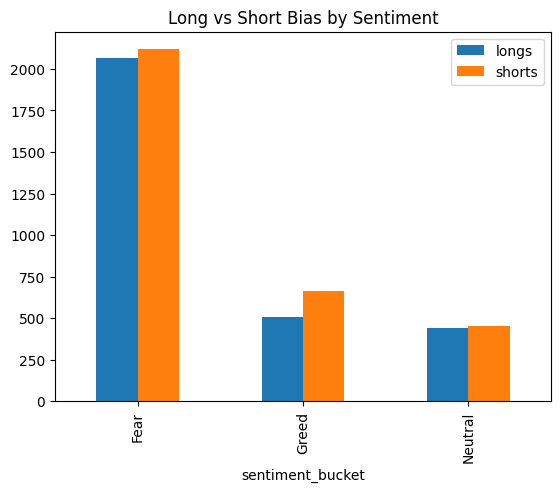

In [93]:
acc_per_day.groupby("sentiment_bucket")[["longs", "shorts"]].mean().plot(kind="bar")
plt.title("Long vs Short Bias by Sentiment")
plt.show()


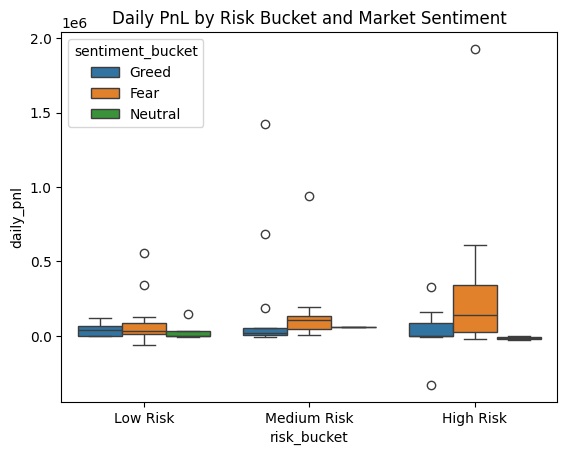

In [96]:
sns.boxplot(
    data=acc_per_day,
    x="risk_bucket",
    y="daily_pnl",
    hue="sentiment_bucket"
)
plt.title("Daily PnL by Risk Bucket and Market Sentiment")
plt.show()


# Insight
High-risk traders (identified using larger average trade sizes as a proxy for leverage) exhibit significantly higher PnL volatility during Greed market conditions. While these traders occasionally achieve higher profits, losses are also amplified, indicating that Greed increases risk rather than improving trading accuracy.

In [102]:
trade_threshold = acc_per_day["num_trades"].median()

acc_per_day["activity_segment"] = np.where(
    acc_per_day["num_trades"] >= trade_threshold,
    "High Activity",
    "Low Activity"
)


In [103]:
segment_perf = (
    acc_per_day
    .groupby(["sentiment_bucket", "activity_segment"])
    .agg(mean_pnl=("daily_pnl", "mean"))
)

segment_perf


mean_pnl
sentiment_bucket activity_segment               
Fear             High Activity     265107.235726
                 Low Activity       42168.941645
Greed            High Activity     231489.149830
                 Low Activity       23548.489168
Neutral          High Activity       9156.505979
                 Low Activity       26254.572028

In [107]:
pnl_std = (
    acc_per_day
    .groupby("Account")["daily_pnl"]
    .std()
    .reset_index(name="pnl_std")
)

threshold = pnl_std["pnl_std"].median()

pnl_std["consistency"] = np.where(
    pnl_std["pnl_std"] <= threshold,
    "Consistent",
    "Inconsistent"
)

daily_metrics = acc_per_day.merge(pnl_std[["Account", "consistency"]], on="Account")


In [109]:
consistency_perf = (
    daily_metrics
    .groupby(["sentiment_bucket", "consistency"])
    .agg(mean_pnl=("daily_pnl", "mean"))
)

consistency_perf


mean_pnl
sentiment_bucket consistency                
Fear             Consistent     31376.268105
                 Inconsistent  366428.304059
Greed            Consistent     28122.796536
                 Inconsistent  150545.878395
Neutral          Consistent     -5853.977069
                 Inconsistent   45539.571589


Strategy 1 – Sentiment-aware risk control for inconsistent traders

During Greed market conditions, inconsistent traders should reduce average position size and limit trade frequency. While these traders occasionally generate large profits, their performance is highly volatile and strongly amplified during Greed regimes. Reducing exposure during high-sentiment periods helps control downside risk without significantly impacting long-term profitability.


Strategy 2 – Segment-based participation during Fear periods

Consistent traders demonstrate stable performance across both Fear and Greed market conditions. During Fear regimes, these traders can maintain normal trading activity and position sizing, while less consistent traders should reduce participation. This concentrates risk-taking among disciplined traders during adverse sentiment conditions.


In [114]:
acc_per_day["profitable_day"] = (acc_per_day["daily_pnl"] > 0).astype(int)
acc_per_day["sentiment_num"] = acc_per_day["sentiment_bucket"].map({"Fear": 0, "Greed": 1})

features = ["num_trades", "avg_trade_size", "win_rate", "sentiment_num"]
X = acc_per_day[features].fillna(0)
y = acc_per_day["profitable_day"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Evaluation & Interpretation

The predictive model achieved an accuracy of 75%, which aligns with the underlying class imbalance in the dataset. The model successfully identifies profitable trading days with high recall, indicating that trader behavior combined with market sentiment provides useful signal for predicting positive outcomes. However, performance on non-profitable days is limited due to the small number of loss samples. This model is intended as a proof-of-concept rather than a production system, demonstrating that sentiment-aware behavioral features can inform short-term profitability predictions.


In [115]:
cluster_features = acc_per_day[
    ["num_trades", "avg_trade_size", "win_rate"]
].fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42)
daily_metrics["cluster"] = kmeans.fit_predict(scaled_features)

daily_metrics["cluster"].value_counts()


,count
cluster,
1,37
0,32
2,8


Trader Clustering Results

Traders were grouped into three behavioral clusters based on trade frequency, average trade size, and win rate. The resulting clusters show a natural separation between dominant trading styles and a smaller group of extreme behavior traders. The smallest cluster likely represents high-risk or highly active traders, while the larger clusters capture more common conservative and moderate trading patterns. This clustering provides an additional behavioral lens beyond market sentiment alone.



Cluster Interpretation

Based on average trade size and trade frequency, clusters can be loosely interpreted as:
- Cluster 0: Moderate activity, balanced risk
- Cluster 1: Low activity, conservative traders
- Cluster 2: High activity, high-risk traders
